# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** 

Установить факторы, от которых зависит стоимость недвижимости. Эти факторы в дальнейшем будут использованы для постороения автоматизированной антимошеннической системы.

**Ход исследования** 

1. Изучим доступные данные.
2. Проверим качество и полноту данных, исправим недочеты в данных, заполним пропуски.
3. Рассчитаем дополнительные столбцы, необходимые для исследования.
4. Проведем исследовательский анализ данных.
5. Сделаем общий вывод.

**Описание данных**

-   `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
-   `balcony` — число балконов
-   `ceiling_height` — высота потолков (м)
-   `cityCenters_nearest` — расстояние до центра города (м)
-   `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
-   `first_day_exposition` — дата публикации
-   `floor` — этаж
-   `floors_total` — всего этажей в доме
-   `is_apartment` — апартаменты (булев тип)
-   `kitchen_area` — площадь кухни в квадратных метрах (м²)
-   `last_price` — цена на момент снятия с публикации
-   `living_area` — жилая площадь в квадратных метрах (м²)
-   `locality_name` — название населённого пункта
-   `open_plan` — свободная планировка (булев тип)
-   `parks_around3000` — число парков в радиусе 3 км
-   `parks_nearest` — расстояние до ближайшего парка (м)
-   `ponds_around3000` — число водоёмов в радиусе 3 км
-   `ponds_nearest` — расстояние до ближайшего водоёма (м)
-   `rooms` — число комнат
-   `studio` — квартира-студия (булев тип)
-   `total_area` — общая площадь квартиры в квадратных метрах (м²)
-   `total_images` — число фотографий квартиры в объявлении

## Откроем файл с данными и изучим общую информацию. 

Имортируем необходимые библиотеки.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [8]:
import warnings
warnings.filterwarnings('ignore')

Прочитаем файл с данными и проверим первые строки.

In [166]:
data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/real_estate_data.csv'

In [10]:
data.corr().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.00,0.10,0.12,0.10,-0.00,0.01,0.10,0.03,-0.03,-0.02,0.10,0.12,-0.00,-0.05,0.02,-0.01,-0.01,-0.00,-0.03
last_price,0.10,1.00,0.65,0.36,0.09,-0.01,0.57,0.03,-0.03,-0.01,0.52,0.03,-0.03,-0.21,0.15,-0.02,0.16,-0.08,0.08
total_area,0.12,0.65,1.00,0.76,0.10,-0.08,0.94,-0.02,-0.07,-0.03,0.61,0.05,-0.03,-0.23,0.16,-0.02,0.16,-0.10,0.15
rooms,0.10,0.36,0.76,1.00,0.05,-0.23,0.85,-0.15,-0.15,-0.09,0.27,0.02,-0.06,-0.18,0.14,-0.05,0.09,-0.06,0.13
ceiling_height,-0.00,0.09,0.10,0.05,1.00,-0.03,0.09,-0.01,0.00,0.04,0.09,0.04,-0.02,-0.09,0.07,-0.02,0.08,-0.06,0.02
floors_total,0.01,-0.01,-0.08,-0.23,-0.03,1.00,-0.17,0.68,0.07,0.05,0.16,0.19,0.11,0.02,-0.25,0.10,-0.12,0.04,-0.05
living_area,0.10,0.57,0.94,0.85,0.09,-0.17,1.00,-0.10,-0.06,-0.03,0.43,0.02,-0.06,-0.23,0.18,-0.05,0.15,-0.08,0.14
floor,0.03,0.03,-0.02,-0.15,-0.01,0.68,-0.10,1.00,0.04,0.04,0.14,0.17,0.07,0.01,-0.16,0.07,-0.08,0.02,-0.04
studio,-0.03,-0.03,-0.07,-0.15,0.00,0.07,-0.06,0.04,1.00,-0.00,NaN,0.03,-0.02,-0.01,-0.03,0.01,0.00,0.00,-0.02
open_plan,-0.02,-0.01,-0.03,-0.09,0.04,0.05,-0.03,0.04,-0.00,1.00,NaN,0.02,-0.01,-0.00,-0.01,0.01,0.01,-0.00,-0.02


Изучим доступные данные. Проверим количество строк и столбцов, типы данных, количество пропущенных значений, корреляции, построим гистограммы по столбцам.

In [11]:
data.shape

(23699, 22)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [13]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [14]:
data.duplicated().sum()

0

Оценим количество пропущенных значений в процентах

In [15]:
data.isna().mean().round(2)

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height          0.39
floors_total            0.00
living_area             0.08
floor                   0.00
is_apartment            0.88
studio                  0.00
open_plan               0.00
kitchen_area            0.10
balcony                 0.49
locality_name           0.00
airports_nearest        0.23
cityCenters_nearest     0.23
parks_around3000        0.23
parks_nearest           0.66
ponds_around3000        0.23
ponds_nearest           0.62
days_exposition         0.13
dtype: float64

In [16]:
data.corr().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.00,0.10,0.12,0.10,-0.00,0.01,0.10,0.03,-0.03,-0.02,0.10,0.12,-0.00,-0.05,0.02,-0.01,-0.01,-0.00,-0.03
last_price,0.10,1.00,0.65,0.36,0.09,-0.01,0.57,0.03,-0.03,-0.01,0.52,0.03,-0.03,-0.21,0.15,-0.02,0.16,-0.08,0.08
total_area,0.12,0.65,1.00,0.76,0.10,-0.08,0.94,-0.02,-0.07,-0.03,0.61,0.05,-0.03,-0.23,0.16,-0.02,0.16,-0.10,0.15
rooms,0.10,0.36,0.76,1.00,0.05,-0.23,0.85,-0.15,-0.15,-0.09,0.27,0.02,-0.06,-0.18,0.14,-0.05,0.09,-0.06,0.13
ceiling_height,-0.00,0.09,0.10,0.05,1.00,-0.03,0.09,-0.01,0.00,0.04,0.09,0.04,-0.02,-0.09,0.07,-0.02,0.08,-0.06,0.02
floors_total,0.01,-0.01,-0.08,-0.23,-0.03,1.00,-0.17,0.68,0.07,0.05,0.16,0.19,0.11,0.02,-0.25,0.10,-0.12,0.04,-0.05
living_area,0.10,0.57,0.94,0.85,0.09,-0.17,1.00,-0.10,-0.06,-0.03,0.43,0.02,-0.06,-0.23,0.18,-0.05,0.15,-0.08,0.14
floor,0.03,0.03,-0.02,-0.15,-0.01,0.68,-0.10,1.00,0.04,0.04,0.14,0.17,0.07,0.01,-0.16,0.07,-0.08,0.02,-0.04
studio,-0.03,-0.03,-0.07,-0.15,0.00,0.07,-0.06,0.04,1.00,-0.00,NaN,0.03,-0.02,-0.01,-0.03,0.01,0.00,0.00,-0.02
open_plan,-0.02,-0.01,-0.03,-0.09,0.04,0.05,-0.03,0.04,-0.00,1.00,NaN,0.02,-0.01,-0.00,-0.01,0.01,0.01,-0.00,-0.02


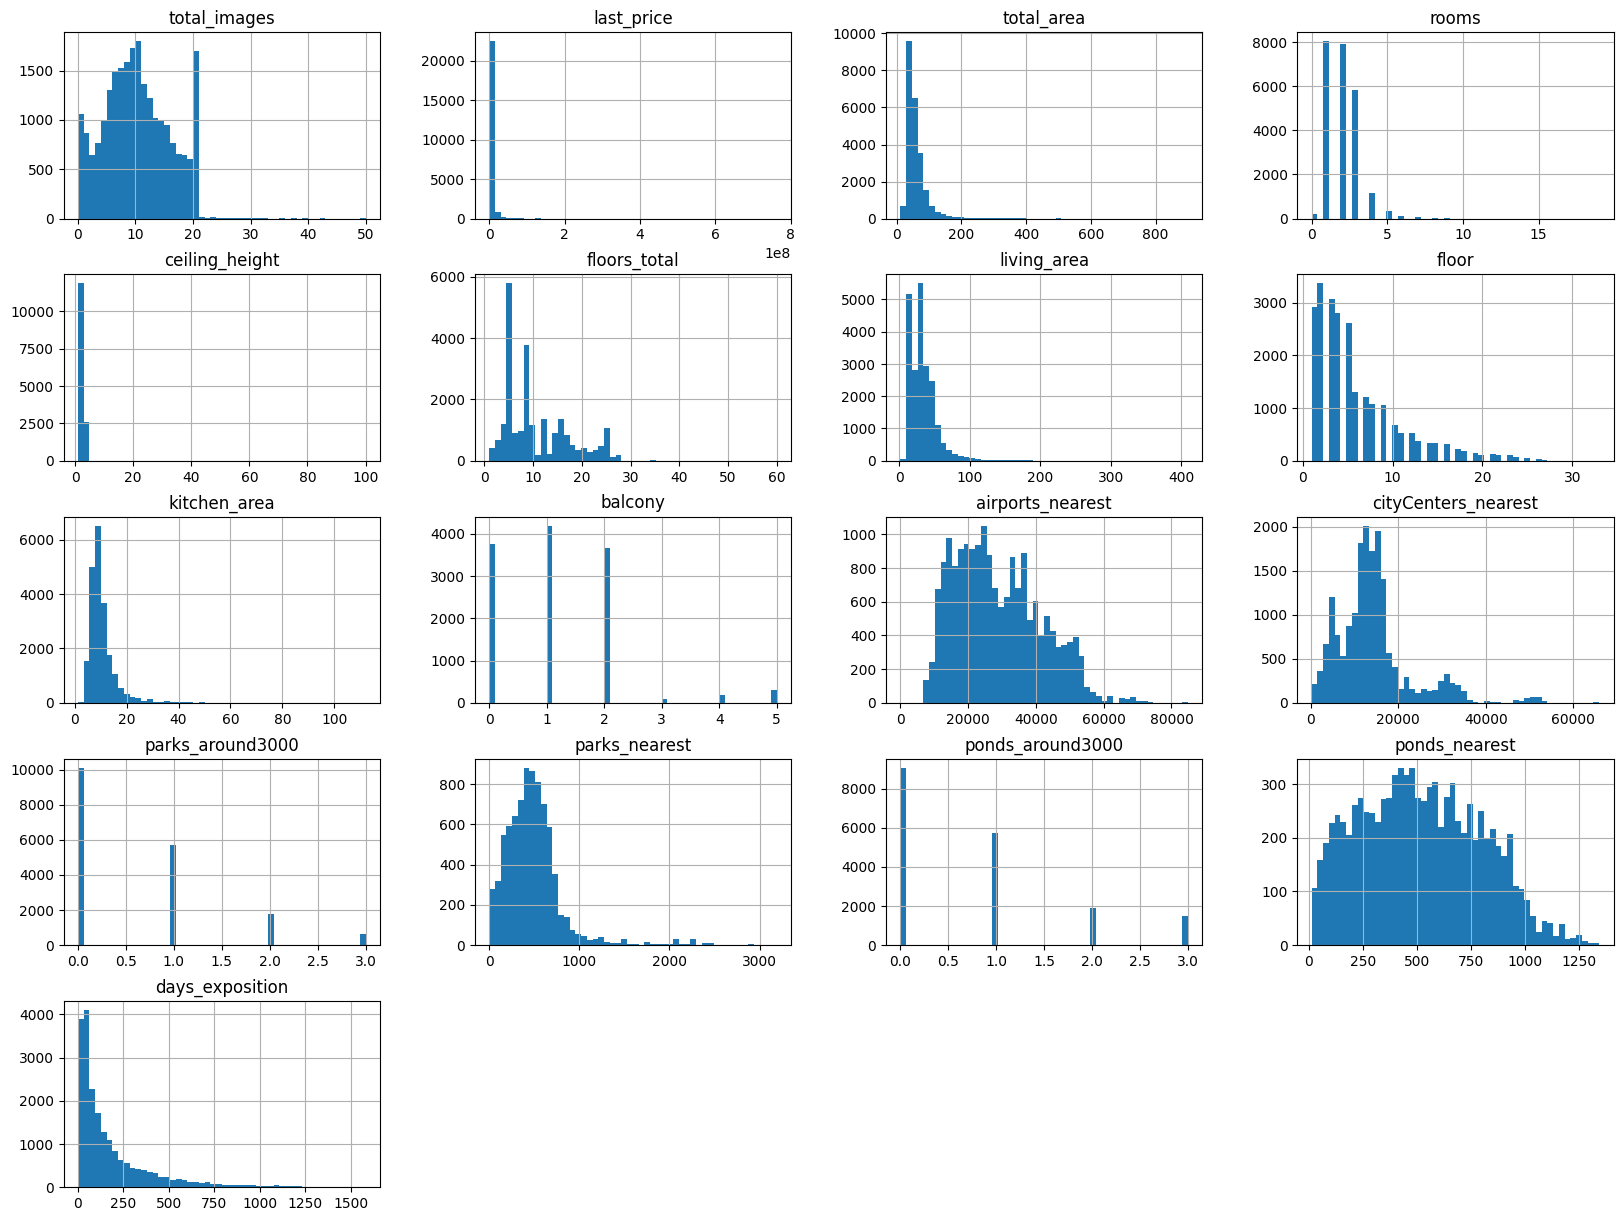

In [17]:

data.hist(figsize=(20, 15), bins=50)
plt.show()

**Вывод**

Необходимо заполнить пропущенные значения в следующих столбцах:

`ceiling_height`   
`floors_total`              
`living_area`               
`is_apartment`      
`kitchen_area`      
`balcony`    
`locality_name`      
`airports_nearest`       
`cityCenters_nearest`     
`parks_around3000`           
`parks_nearest`       
`ponds_around3000`    
`ponds_nearest`     
`days_exposition`        

Привести названия к единому стилю в следующих столбцах:

`parks_around3000`     
`ponds_around3000`     
`cityCenters_nearest`    

Исправить типы данных:

- из float в int:

`last_price`      
`floors_total`     
`balcony`      
`airports_nearest`       
`cityCenters_nearest`     
`parks_nearest`      
`days_exposition`    
`parks_around3000`      
`ponds_around3000`     

- перевести в boolean:

`is_apartment`

- перевести в datetime:

`first_day_exposition`
 
- перевести в category:

`locality_name`           


total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                 category
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64

## Предобработка данных

### Приведем названия столбцов к единому формату 


In [18]:
data = data.rename( 
    columns={
        'parks_around3000':'parks_around_3000', 
        'ponds_around3000':'ponds_around_3000', 
        'cityCenters_nearest':'city_centers_nearest'
    }
)

In [19]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Столбец `total_images`                

Изучим значения в столбце.

In [20]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

In [21]:
data['total_images'].dtypes

dtype('int64')

In [22]:
data['total_images'].value_counts().sort_index()

0     1059
1      872
2      640
3      769
4      986
5     1301
6     1482
7     1521
8     1585
9     1725
10    1798
11    1362
12    1225
13    1015
14     986
15     948
16     761
17     650
18     642
19     603
20    1694
21      12
22       8
23      16
24       8
25       1
26       5
27       2
28       4
29       3
30       2
31       2
32       4
35       2
37       1
39       1
42       1
50       3
Name: total_images, dtype: int64

**Вывод** 

Все значения в столбце похожи на реальные. Исправлений не нужно. 

### Столбец `last_price`

Пропущенных значений в столбце нет, поэтому проверим значения на выбросы.

In [23]:
last_price_describe = data['last_price'].describe()
last_price_describe

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Проверим минимальные значения цены.

In [24]:
data['last_price'].value_counts().sort_index().head(20)

12190.0      1
430000.0     2
440000.0     1
450000.0     4
470000.0     3
480000.0     1
490000.0     2
500000.0     4
520000.0     1
530000.0     1
550000.0     6
560000.0     3
565000.0     1
580000.0     1
585000.0     1
590000.0     1
600000.0    11
620000.0     1
630000.0     4
650000.0    14
Name: last_price, dtype: int64

<AxesSubplot:>

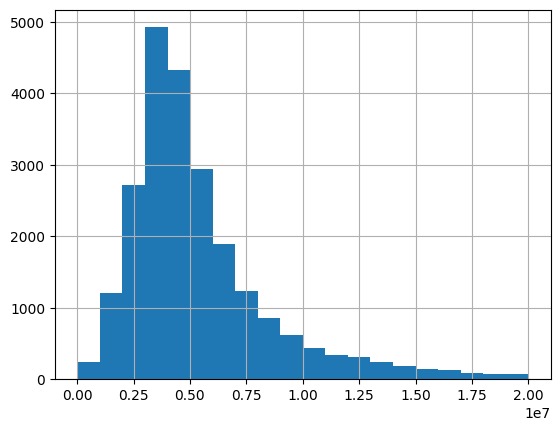

In [25]:
data.query('last_price < 20000000')['last_price'].hist(bins=20)

In [26]:
data.query('last_price < 500000').sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,...,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,...,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,NaN,1.0,23.0,1,NaN,...,5.8,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,NaN,5.0,30.3,3,NaN,...,5.5,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.65,2.0,NaN,1,NaN,...,NaN,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,...,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
18867,1,470000.0,41.0,2018-02-11T00:00:00,1,NaN,5.0,32.0,3,NaN,...,9.0,NaN,деревня Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.0
21912,0,470000.0,37.0,2018-02-18T00:00:00,1,NaN,3.0,NaN,3,NaN,...,NaN,NaN,поселок Совхозный,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Вероятно стоимость в строке №8793 заполнена в тыс рублей. Заменим значение на верное

In [27]:
data.loc[8793, 'last_price'] = data.loc[8793, 'last_price']*1000

Проверим максимальные значения цены.

In [28]:
data['last_price'].value_counts().sort_index().tail(20)

131000000.0    1
135000000.0    2
140000000.0    3
148000000.0    1
150000000.0    2
155000000.0    1
159000000.0    1
159984000.0    1
160000000.0    1
180000000.0    1
190870000.0    1
230000000.0    1
240000000.0    1
245000000.0    1
289238400.0    1
300000000.0    1
330000000.0    1
401300000.0    1
420000000.0    1
763000000.0    1
Name: last_price, dtype: int64

In [29]:
data.query('last_price > 150000000').sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
16495,12,159000000.0,260.0,2017-04-04T00:00:00,4,NaN,5.0,180.0,4,NaN,...,30.0,2.0,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,178.0
2536,16,159984000.0,242.4,2015-08-27T00:00:00,4,3.85,9.0,131.0,7,NaN,...,20.0,0.0,Санкт-Петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,501.0
19155,20,160000000.0,243.0,2018-11-12T00:00:00,5,NaN,5.0,145.0,4,NaN,...,33.0,NaN,Санкт-Петербург,22640.0,555.0,3.0,285.0,1.0,200.0,18.0
19865,20,180000000.0,347.0,2015-01-21T00:00:00,8,3.90,6.0,260.0,3,NaN,...,45.0,0.0,Санкт-Петербург,23962.0,3794.0,2.0,537.0,3.0,501.0,834.0
8900,13,190870000.0,268.0,2016-03-25T00:00:00,3,NaN,8.0,132.0,7,NaN,...,40.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,901.0
5893,3,230000000.0,500.0,2017-05-31T00:00:00,6,NaN,7.0,NaN,7,NaN,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
13749,7,240000000.0,410.0,2017-04-01T00:00:00,6,3.40,7.0,218.0,7,NaN,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0
16461,17,245000000.0,285.7,2017-04-10T00:00:00,6,3.35,7.0,182.8,4,NaN,...,29.8,NaN,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
22831,18,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6.0,63.7,6,NaN,...,30.2,NaN,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN


Есть сильно выпадающее значение: квартира площадью 109 кв. м. стоит 120 млрд. рублей. В этом случае сложно заподозрить, что цена указана в копейках. Поэтому удалим это значение из датафрейма.

In [30]:
data = data.drop(index=8793)

Также удалим все значения с ценой выше 20 млн

In [31]:
data = data.query('last_price < 20000000')

Изменим тип данных в столбце на int

In [32]:
data['last_price'] = data['last_price'].astype('int')

**Вывод**

В столбце нашли два значения, которые являются выбросами. 

Одно из них(минимальное) мы исправили, так как можно было предположить, что там была ошибка при указании цены. Цену продавец указал в тыс. рублей.

Второе(максимальное) мы из датафрейма удалили, так как нет возможности обьяснить причину появления такого выброса.

Изменили тип данных на int

### Столбец `total_area`

In [33]:
data['total_area'].describe()

count    22975.000000
mean        56.676032
std         24.608976
min         12.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        320.000000
Name: total_area, dtype: float64

In [34]:
data['total_area'].value_counts().sort_index()

12.0     1
13.0     3
13.2     1
14.0     1
15.0     2
        ..
259.6    1
263.8    1
287.5    1
309.7    1
320.0    1
Name: total_area, Length: 1938, dtype: int64

<AxesSubplot:>

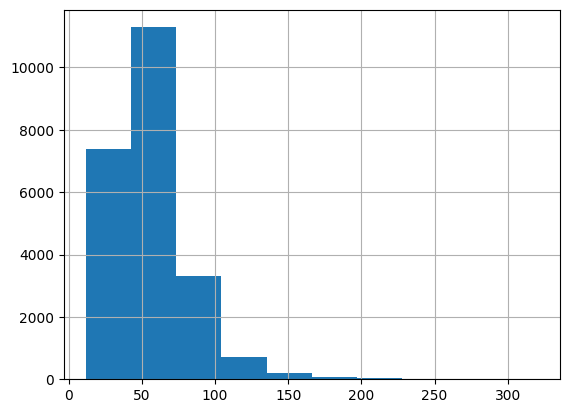

In [35]:
data['total_area'].hist()

In [36]:
data.query('total_area > 250' )

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2489,9,12500000,255.0,2017-04-21T00:00:00,3,NaN,2.0,153.9,2,NaN,...,100.70,0.0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0
9397,10,16073000,263.8,2019-01-30T00:00:00,3,NaN,19.0,NaN,4,NaN,...,23.42,NaN,Санкт-Петербург,18805.0,4400.0,0.0,NaN,0.0,NaN,35.0
11087,3,14000000,320.0,2017-09-27T00:00:00,6,NaN,3.0,190.0,3,NaN,...,28.00,0.0,Красное Село,26020.0,29445.0,1.0,569.0,0.0,NaN,8.0
12067,5,14500000,259.6,2015-09-28T00:00:00,5,2.81,17.0,148.6,16,NaN,...,15.40,NaN,Санкт-Петербург,39408.0,11111.0,0.0,NaN,0.0,NaN,1232.0
13397,14,19500000,309.7,2016-02-03T00:00:00,9,NaN,5.0,199.0,5,NaN,...,14.30,0.0,Санкт-Петербург,10328.0,9987.0,2.0,352.0,0.0,NaN,468.0
22238,12,19500000,287.5,2017-12-27T00:00:00,7,NaN,4.0,183.7,3,NaN,...,26.00,NaN,Санкт-Петербург,21881.0,4726.0,1.0,578.0,1.0,853.0,90.0


In [37]:
data.query('total_area < 15' )

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
17961,3,1400000,13.0,2017-12-03T00:00:00,1,2.60,9.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19546,3,1850000,13.0,2019-03-11T00:00:00,1,3.40,5.0,NaN,2,False,...,NaN,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
19558,2,1686000,13.2,2018-12-17T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0
19642,5,1190000,14.0,2018-07-29T00:00:00,1,NaN,5.0,11.0,1,NaN,...,2.0,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
19807,0,3800000,13.0,2018-07-04T00:00:00,1,NaN,5.0,10.0,3,NaN,...,NaN,NaN,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
19904,4,2400000,12.0,2017-07-19T00:00:00,1,2.55,5.0,10.0,2,NaN,...,NaN,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0


Удалим строки с плошадью меньше 15 кв. м. и больше 250 кв. м.

In [38]:
data = data.query('15 < total_area < 250')

In [39]:
data['total_area'] = data['total_area'].round(1)

**Вывод**

Убрали выбросы. Проблем со столбцом total_area нет.

### Столбец `first_day_exposition`

Приведем данные в столбце к типу datetime.

In [40]:
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
4    2018-06-19T00:00:00
5    2018-09-10T00:00:00
Name: first_day_exposition, dtype: object

In [41]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [42]:
data['first_day_exposition'].dtypes

dtype('<M8[ns]')

### Столбец `rooms `               

In [43]:
data['rooms'].value_counts().sort_index()

0      196
1     8028
2     7862
3     5563
4     1004
5      222
6       57
7       20
8        5
9        1
10       1
11       1
Name: rooms, dtype: int64

In [44]:
data['rooms'].describe()

count    22960.000000
mean         2.008667
std          0.982740
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

Посмотрим внимательнее на строки с 0  и 1 комнат.

In [45]:
data[(data['rooms']==0)&(data['total_area']>40)].loc[: , 'total_area':'kitchen_area']

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area
3458,73.6,2017-05-18,0,NaN,3.0,50.0,1,NaN,True,False,NaN
7237,42.6,2017-11-27,0,NaN,16.0,25.7,2,NaN,False,True,NaN
10008,44.2,2017-09-14,0,2.7,9.0,32.2,1,NaN,True,False,NaN
13613,58.4,2019-04-26,0,3.3,7.0,33.0,6,NaN,True,False,NaN
15319,43.3,2017-07-20,0,2.8,9.0,28.2,2,NaN,True,False,NaN
16130,42.1,2018-04-13,0,NaN,20.0,30.0,10,NaN,True,False,NaN
20082,98.4,2017-11-08,0,3.1,5.0,60.5,2,NaN,True,False,NaN
21227,71.0,2017-07-21,0,5.8,5.0,68.0,5,NaN,True,False,NaN


In [46]:
data[(data['studio']==True)|(data['open_plan']==True)].loc[: , 'total_area':'kitchen_area'].sort_values(by='total_area')

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area
8886,15.5,2018-08-22,0,NaN,5.0,10.0,2,NaN,True,False,NaN
9412,16.0,2017-12-10,0,NaN,6.0,13.0,1,NaN,False,True,NaN
716,17.0,2017-06-07,0,2.70,9.0,12.0,1,NaN,True,False,NaN
12996,18.0,2019-01-25,0,2.60,5.0,16.0,3,NaN,True,False,NaN
8755,18.8,2017-11-22,0,2.75,19.0,15.8,1,NaN,True,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8861,64.5,2015-11-13,3,3.00,5.0,48.0,2,False,False,True,NaN
21227,71.0,2017-07-21,0,5.80,5.0,68.0,5,NaN,True,False,NaN
3458,73.6,2017-05-18,0,NaN,3.0,50.0,1,NaN,True,False,NaN
19796,97.2,2016-04-05,4,3.35,5.0,71.3,2,False,False,True,NaN


Изменим количество комнат в зависимости от планироки. Так в столбцах, где open_plan =True количество комнат проставим 0
А в столбцах где studio = True поставим 1.

In [47]:
data['rooms'].loc[data['open_plan']==True] = 0

In [48]:
data['rooms'].loc[data['studio']==True] = 1

Удалим строки со значением комнат больше 8.

In [49]:
data = data.query('rooms <= 8')

In [50]:
data.shape

(22957, 22)

### Столбец `ceiling_height `           


In [51]:
data['ceiling_height'].value_counts().sort_index()

1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: ceiling_height, Length: 168, dtype: int64

<AxesSubplot:>

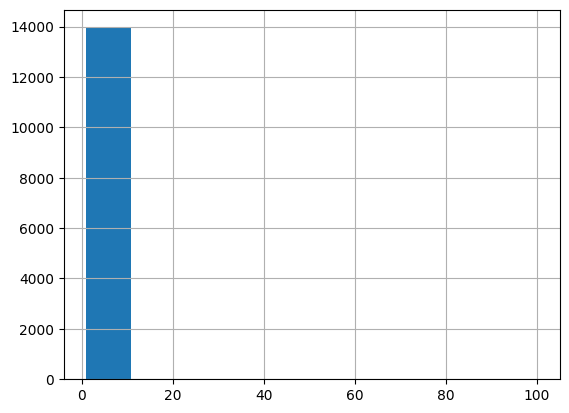

In [52]:
data['ceiling_height'].hist()

Изучим значения больше 3.5 м.

In [53]:
data.query('ceiling_height > 3.5')['ceiling_height'].value_counts().sort_index()

3.52       3
3.53       1
3.54       6
3.55      14
3.56       3
3.57       1
3.59       1
3.60      29
3.62       2
3.63       3
3.65       4
3.66       3
3.67       3
3.68       1
3.70      25
3.75       7
3.78       3
3.80      17
3.83       1
3.84       1
3.85       1
3.87       1
3.88       1
3.90       9
3.93       1
3.95       6
3.98       1
4.00      28
4.06       1
4.10       2
4.14       1
4.15       1
4.19       2
4.20       8
4.25       1
4.30       1
4.37       1
4.40       1
4.50       6
4.70       1
4.80       1
5.00       1
5.30       1
5.80       1
8.00       3
8.30       1
10.30      1
14.00      1
20.00      1
22.60      1
24.00      1
25.00      7
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: ceiling_height, dtype: int64

Рассчитаем медиану и заполним ей пропуски.

In [54]:
ceiling_median = data.query('1.7 < ceiling_height < 6.1')['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_median)


Уберем строки со значением меньше 1.7 м.

In [55]:
data = data.query('ceiling_height > 1.7')

Внимательнеее изучим значения больше 6.1

In [56]:
data.query('ceiling_height > 6.1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,3600000,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000,25.0,2017-09-27,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5863,20,5650000,45.0,2018-08-15,1,8.3,16.0,19.3,14,NaN,...,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


Уберем строку со значением 100

In [57]:
data = data.query('ceiling_height != 100')

Исправим двухзначные значения, по которым ясно, что это ошибки заполнения. Это значения типа 22, 23 и т.д.

In [58]:
data['ceiling_height'].loc[data['ceiling_height'] > 17] = data['ceiling_height'].loc[data['ceiling_height'] > 17]/10

Уберем значения выше 5

In [59]:
data = data.query('ceiling_height < 5')

In [60]:
data.shape

(22945, 22)

### Столбец `floors_total`

In [61]:
data['floors_total'].value_counts().sort_index()

1.0       25
2.0      372
3.0      645
4.0     1144
5.0     5650
6.0      808
7.0      514
8.0      307
9.0     3714
10.0    1136
11.0     188
12.0    1331
13.0     218
14.0     548
15.0     349
16.0    1347
17.0     819
18.0     496
19.0     332
20.0     261
21.0     158
22.0     285
23.0     346
24.0     466
25.0    1061
26.0     123
27.0     164
28.0      21
29.0       1
33.0       1
34.0       1
35.0      24
36.0       3
37.0       1
52.0       1
60.0       1
Name: floors_total, dtype: int64

In [62]:
data['floors_total'].isna().sum()

84

In [63]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.1,2016-11-23,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.8,2015-08-01,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.6,2017-04-06,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.0,2017-04-22,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21753,7,6800000,57.0,2017-05-01,2,2.65,NaN,NaN,21,NaN,...,NaN,0.0,Санкт-Петербург,17618.0,14600.0,2.0,104.0,0.0,NaN,36.0
22542,5,8500000,63.5,2017-05-24,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64.5,2017-04-02,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110.4,2016-11-20,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0


В Петербурге макcимально высокое здание 37 этажей. Поэтому отбросим строки где значения больше 37.

In [64]:
data = data.query('floors_total <= 37')

In [65]:
data.shape

(22859, 22)

Вероятность,что пропущенные значения не являются последним этажом большая. Добавим к пропущенным значениям этажей 1, чтобы они не учитывались, как последний этаж в дальнейшем.

In [66]:
data['floors_total'].fillna(data['floor'].loc[data['floors_total'].isna()]+1)

0        16.0
1        11.0
2         5.0
4        14.0
5        12.0
         ... 
23694     5.0
23695     5.0
23696     3.0
23697    17.0
23698     5.0
Name: floors_total, Length: 22859, dtype: float64

In [67]:
data['floors_total'] = data['floors_total'].astype('int')

### Столбец `living_area`

In [68]:
data['living_area'].isna().sum()

1766

По таблице корреляции жилая площадь коррелирует с обшей с коэффициентом 0,94. Посчитаем соотношение среднне между жилой и общей площадью.

In [69]:
df_na = data.query('living_area > 0')

In [70]:
df_na.shape

(21093, 22)

In [71]:
median_living_coef =(df_na['living_area']/df_na['total_area']).mean()
median_living_coef

0.5650260491801649

In [72]:
data['living_area'].loc[data['living_area'].isna()] = data['total_area'].loc[data['living_area'].isna()]*median_living_coef

In [73]:
data['living_area'] = data['living_area'].round(1)

In [74]:
data['living_area'].isna().sum()

0

In [75]:
data.shape

(22859, 22)

### Столбец `floor`

In [76]:
data['floor'].value_counts().sort_index()

1     2864
2     3264
3     2964
4     2679
5     2519
6     1231
7     1158
8     1039
9     1024
10     666
11     508
12     510
13     367
14     325
15     332
16     307
17     223
18     171
19     132
20     106
21     118
22     111
23      98
24      60
25      43
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64

In [77]:
data['floor'].isna().sum()

0

**Вывод**

Проблем нет 

### Столбец `is_apartment`

Раз явно не указанно, что это аппартаменты, то скорее всего квартира аппартаментами не является.

Заменим NaN  значения на False и приведем данные  в столбце к типу boolean.

In [78]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')
data['is_apartment'].unique()

array([False,  True])

In [79]:
data['is_apartment'].dtypes

dtype('bool')

### Столбец `studio`

In [80]:
data['studio'].value_counts().sort_index()

False    22714
True       145
Name: studio, dtype: int64

In [81]:
data['studio'].isna().sum()

0

Все ОК

### Столбец `open_plan`

In [82]:
data['open_plan'].value_counts().sort_index()

False    22794
True        65
Name: open_plan, dtype: int64

In [83]:
data['open_plan'].isna().sum()

0

Ничего исправлять не нужно

### Столбец `kitchen_area`

In [84]:
data['kitchen_area'].isna().sum()

2136

Заполним kitchen_area через коэффициент соотношения total_area и kitchen_area. 

In [85]:
df_na = data.query('kitchen_area>0')

In [86]:
df_na.shape

(20723, 22)

In [87]:
median_kitchen_coef =(df_na['kitchen_area']/df_na['total_area']).mean()
median_kitchen_coef

0.18815047584257746

In [88]:
data['kitchen_area'].loc[data['kitchen_area'].isna()] \
= data['total_area'].loc[data['kitchen_area'].isna()]*median_kitchen_coef

In [89]:
data['kitchen_area'].isna().sum()

0

In [90]:
data.shape

(22859, 22)

### Столбец `balcony`

Можно предположить, что значения отсутствуют в столбцах, потому что собственники квартир не заполняли эту инфомацию так как в их квартирах нет балконов. Потэтому заменим все NaN на 0. Также приведем столбец к типу данных int.

In [91]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [92]:
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

### Столбец `locality_name`

In [93]:
data['locality_name'].isna().sum()

47

In [94]:
len(data['locality_name'].unique())

365

Строк с отсутствиен названия населенного пунка 49. Восстановить название населенных пунктов не представляется возможным. Так как таких строк немного, то их можно удалить.

In [95]:
data = data[data['locality_name'].notna()]


Посмотрим какие уникальные значения у нас есть в столбце.

In [96]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Приведем названия к одному типу, удалим лишную информацию и оставим только наименование населенного пункта

In [97]:
poselok_list = ['поселок ', 'городского типа ', 'городской ',  'деревня ', 
                'коттеджный ', 'село ', 'посёлок ', 'при железнодорожной станции ',
                'станции ', 'садоводческое некоммерческое товарищество ', 'садовое товарищество ']
for poselok in poselok_list:
    data['locality_name'] = data['locality_name'].str.replace(poselok, '')

In [98]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [99]:
len(data['locality_name'].unique())

305

Приведем к типу данных категория

In [100]:
data['locality_name'] = data['locality_name'].astype('category')


### Столбец `airports_nearest`

In [101]:
data['airports_nearest'].value_counts().sort_index()

0.0        1
6450.0     2
6914.0     1
6949.0     1
6989.0     6
          ..
83758.0    1
84006.0    1
84665.0    1
84853.0    1
84869.0    1
Name: airports_nearest, Length: 8017, dtype: int64

Заполним пропущенные значения 0.

In [102]:
data['airports_nearest'] = data['airports_nearest'].fillna(0)

Поменяем тип данных на int

In [103]:
data['airports_nearest'] = data['airports_nearest'].astype('int')

In [104]:
data['airports_nearest'].isna().sum()

0

### Столбец `city_centers_nearest`

In [105]:
data['city_centers_nearest'].value_counts().sort_index()

208.0      1
215.0      1
287.0      1
291.0      1
329.0      1
          ..
64857.0    1
65105.0    1
65764.0    1
65952.0    1
65968.0    1
Name: city_centers_nearest, Length: 7413, dtype: int64

Заполним пропущенные значения 0

In [106]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(0)

In [107]:
data['city_centers_nearest'].isna().sum()

0

Поменяем тип данных на int

In [108]:
data['city_centers_nearest'] = data['city_centers_nearest'].astype('int')

### Столбец `parks_around_3000`

In [109]:
data['parks_around_3000'].value_counts().sort_index()

0.0    9842
1.0    5383
2.0    1573
3.0     534
Name: parks_around_3000, dtype: int64

Заменим пропущенные значения на маркер 999

In [110]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(999)

In [111]:
data['parks_around_3000'].isna().sum()

0

Сменим тип данных на int

In [112]:
data['parks_around_3000'] = data['parks_around_3000'].astype('int')

### Столбец `parks_nearest`

In [113]:
data['parks_nearest'].value_counts().sort_index()

1.0       1
3.0       1
4.0       1
7.0       1
9.0       2
         ..
2905.0    1
2984.0    1
3013.0    1
3064.0    1
3190.0    2
Name: parks_nearest, Length: 988, dtype: int64

Заполним пропущенные значения 0

In [114]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)

In [115]:
data['parks_nearest'].isna().sum()

0

Поменяем тип данных на int

In [116]:
data['parks_nearest'] =data['parks_nearest'].astype('int')

### Столбец `ponds_around_3000`

In [117]:
data['ponds_around_3000'].value_counts().sort_index()

0.0    8836
1.0    5452
2.0    1750
3.0    1294
Name: ponds_around_3000, dtype: int64

Заполним пропущенные значения на 999

In [118]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(999)

In [119]:
data['ponds_around_3000'].isna().sum()

0

Сменим тип данных на int

In [120]:
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')

### Столбец `ponds_nearest`

In [121]:
data['ponds_nearest'].value_counts().sort_index()

13.0      2
16.0      8
19.0      4
20.0      5
22.0      4
         ..
1299.0    1
1313.0    1
1337.0    1
1341.0    2
1344.0    1
Name: ponds_nearest, Length: 1086, dtype: int64

Заменим пропущенные значения на 0

In [122]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

In [123]:
data['ponds_nearest'].isna().sum()

0

Сменим тип данных на int

In [124]:
data['ponds_nearest'] = data['ponds_nearest'].astype('int')

### Столбец `days_exposition`      

In [125]:
data['days_exposition'].value_counts().sort_index()

1.0         1
2.0         3
3.0       155
4.0       172
5.0       144
         ... 
1497.0      1
1512.0      2
1513.0      1
1553.0      1
1580.0      1
Name: days_exposition, Length: 1121, dtype: int64

Не станем заполнять пропущенные значения, так как их наличие говорит о том, что квартира не продана.

Заменим тип данных на int

In [126]:
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

#Альтернативное решение
#data['days_exposition'] = data['days_exposition'].fillna(-1).astype('int').replace(-1, np.nan)

### Вывод

В тех столбцах, где было можно заполнили пропущенные значения. Убрали явные выбросы, природу которых сложно обьяснить. 
При этом столбцы с географическими значениями оставили с пропусками. Заполнить их невозможно и выбрасывать не нужно.
Изменили типы данных на верные.


In [127]:
data.shape

(22812, 22)

In [128]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition         2966
dtype: int64

In [129]:
data.dtypes

total_images                     int64
last_price                       int32
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                 category
airports_nearest                 int32
city_centers_nearest             int32
parks_around_3000                int32
parks_nearest                    int32
ponds_around_3000                int32
ponds_nearest                    int32
days_exposition                  Int64
dtype: object

## Посчитаем и добавим в таблицу новые столбцы

### Цена одного квадратного метра

Рассчитаем цену одного квадратного метра, разделив цену на общую площадь, и добавил в столбец  `metr_price`

In [130]:
data['metr_price'] = (data['last_price']/data['total_area']).round(0).astype('int')

###  День публикации обьявления

Создадим столбец `day` и добавим в него порядковый номер дня недели публикации объявления.

In [131]:
data['day'] = data['first_day_exposition'].dt.weekday

### Месяц публикации обьявления

Создадим столбец `month` и добавим в него порядковый номер месяца публикации объявления.

In [132]:
data['month'] = data['first_day_exposition'].dt.month

### Год публикации обьявления

Создадим столбец `year` и добавим в него порядковый номер месяца публикации объявления.

In [133]:
data['year'] = data['first_day_exposition'].dt.year

### Тип этажа квартиры

Создадим столбец `floor_type` с категорией этажа.

In [134]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

### Расстояние в км до центра города

Добавим столбец `center_distance` с расстоянием до центра города в километрах.

In [135]:
data['center_distance'] = (data['city_centers_nearest']/1000).round(0).astype('int')

In [136]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day,month,year,floor_type,center_distance
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482,2,755,<NA>,120370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,0,0,81,82921,1,12,2018,первый,19
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90,2,574,558,92786,3,8,2015,другой,14
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112,1,48,121,100000,1,6,2018,другой,8
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0,999,0,55,95066,0,9,2018,другой,0
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,0,0,0,155,99196,3,11,2017,другой,19
7,5,7915000,71.6,2019-04-18,2,2.65,24,40.5,22,False,...,0,0,0,<NA>,110545,3,4,2019,другой,12
8,20,2900000,33.2,2018-05-23,1,2.65,27,15.4,26,False,...,0,999,0,189,87349,2,5,2018,другой,0
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,0,0,0,289,88525,6,2,2017,другой,15
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,310,2,553,137,127525,3,11,2017,другой,14


## Проведите исследовательский анализ данных

### Исследование параметров обьектов

Изучим отдельно следующие параметры:  
  
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

In [137]:
parameters_list = [
                  'total_area', 'living_area', 'kitchen_area', 'last_price',
                  'rooms', 'ceiling_height', 'floor', 'floor_type', 'floors_total', 
                  'city_centers_nearest', 'airports_nearest', 'parks_nearest', 'day', 'month'
                 ]
data[parameters_list].describe().round(1)

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest,day,month
count,22812.0,22812.0,22812.0,22812.0,22812.0,22812.0,22812.0,22812.0,22812.0,22812.0,22812.0,22812.0,22812.0
mean,56.6,32.4,10.1,5405287.9,2.0,2.7,5.9,10.7,11023.3,21904.1,162.2,2.6,6.4
std,24.2,16.3,4.7,3185694.6,1.0,0.2,4.9,6.6,9712.9,16632.8,303.5,1.8,3.5
min,15.5,2.0,1.3,430000.0,0.0,1.8,1.0,1.0,0.0,0.0,0.0,0.0,1.0
25%,40.0,18.8,7.0,3400000.0,1.0,2.6,2.0,5.0,1852.0,9655.0,0.0,1.0,3.0
50%,51.0,30.0,9.0,4550000.0,2.0,2.6,4.0,9.0,11489.5,21445.0,0.0,3.0,6.0
75%,67.0,41.0,11.5,6500000.0,3.0,2.7,8.0,16.0,15388.5,34548.2,284.0,4.0,10.0
max,248.0,176.6,64.0,19999000.0,8.0,4.8,33.0,37.0,65968.0,84869.0,3190.0,6.0,12.0


array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'last_price'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'floors_total'}>],
       [<AxesSubplot:title={'center':'city_centers_nearest'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

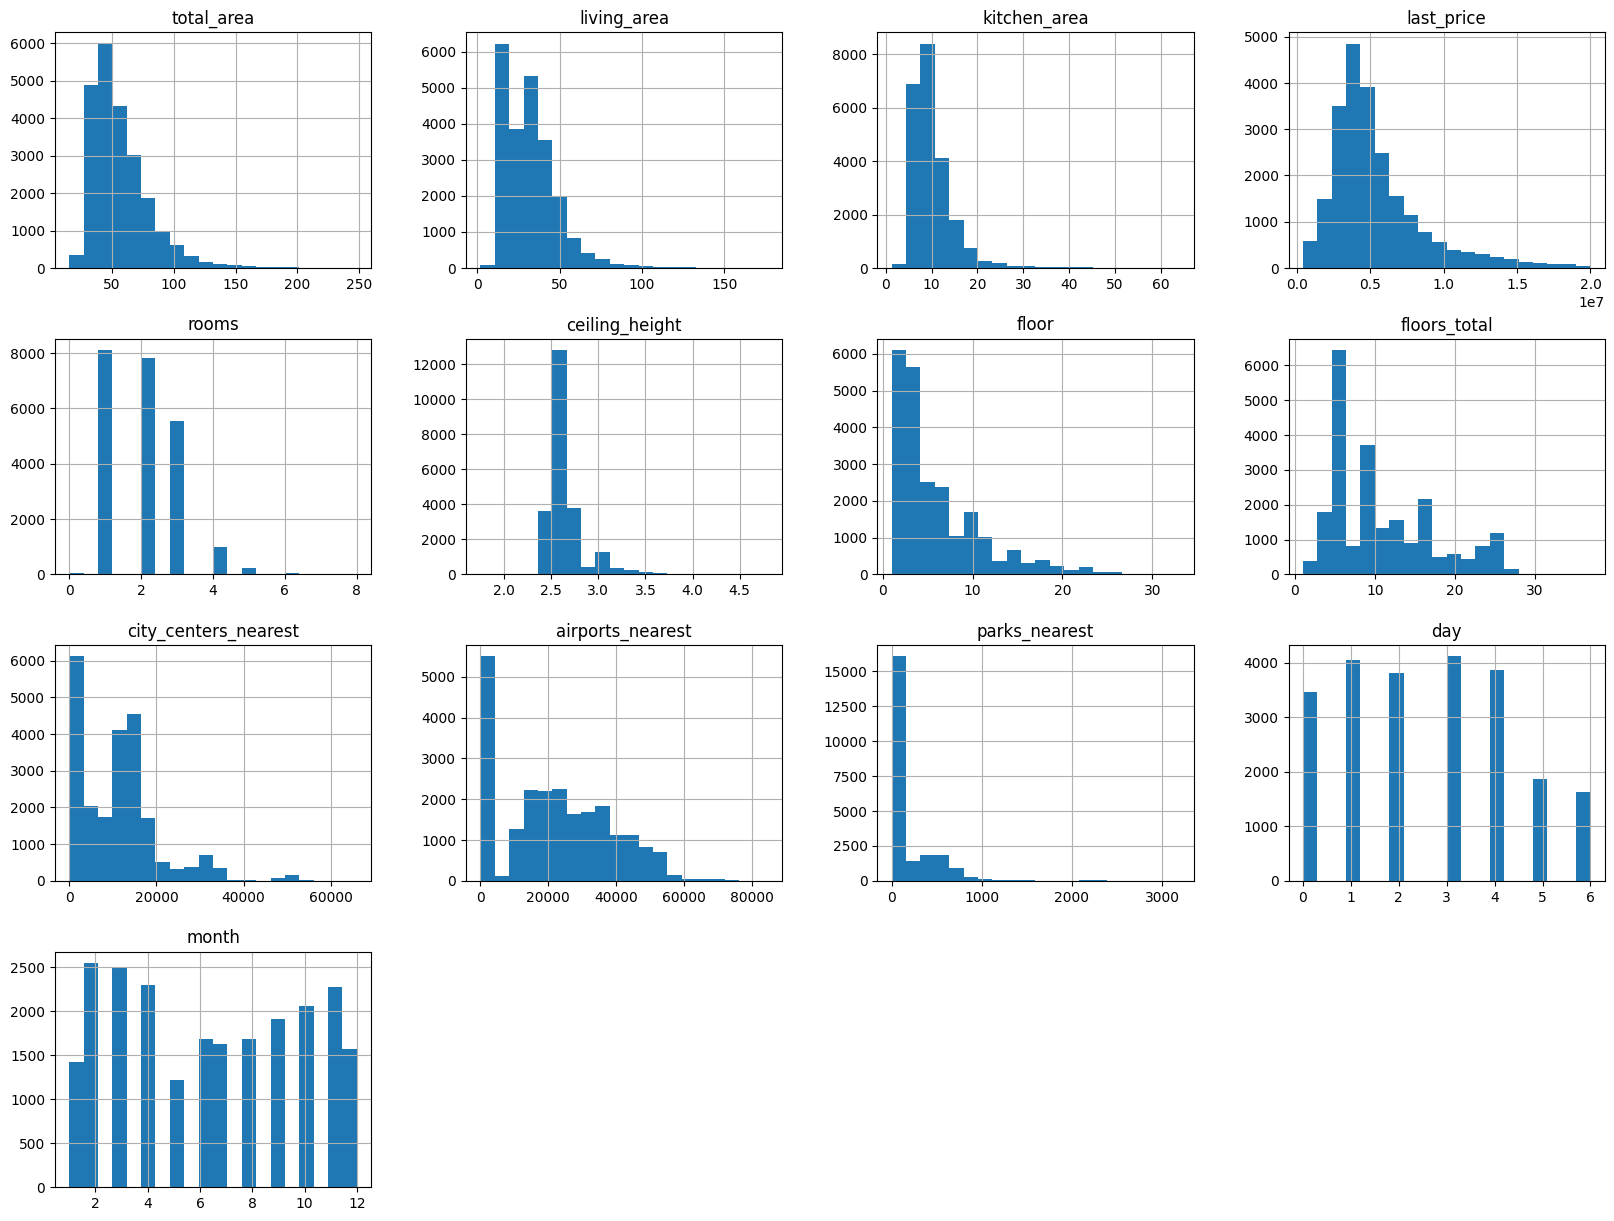

In [138]:
data[parameters_list].hist(bins=20, figsize=(20, 15))


In [139]:
data['floor_type'].value_counts().sort_index()

другой       16774
первый        2859
последний     3179
Name: floor_type, dtype: int64

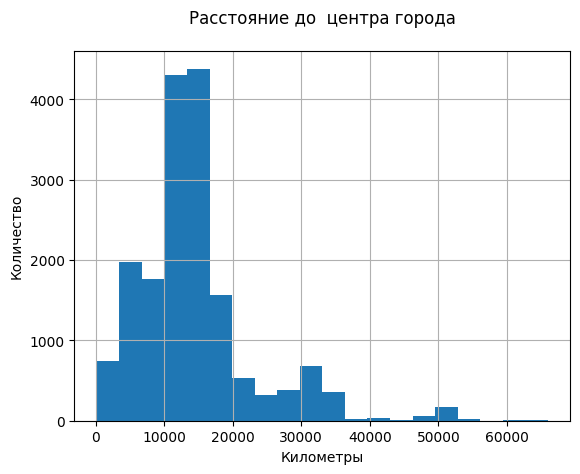

In [140]:
data.query('city_centers_nearest > 0')['city_centers_nearest'].hist(bins=20)
plt.title('Расстояние до  центра города', pad=20)
plt.xlabel('Километры')
plt.ylabel('Количество')
plt.show()

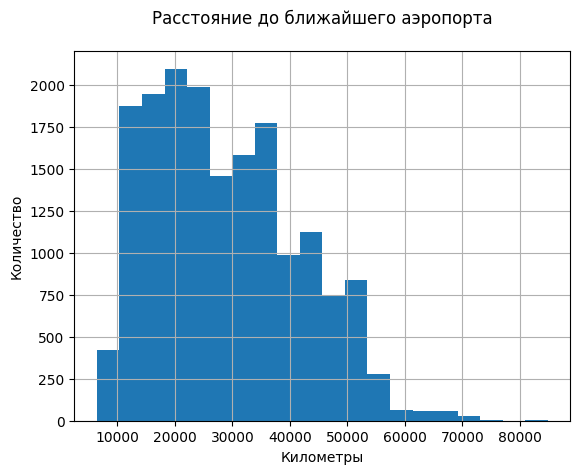

In [141]:
data.query('airports_nearest > 0')['airports_nearest'].hist(bins=20)
plt.title('Расстояние до ближайшего аэропорта', pad=20)
plt.xlabel('Километры')
plt.ylabel('Количество')
plt.show()

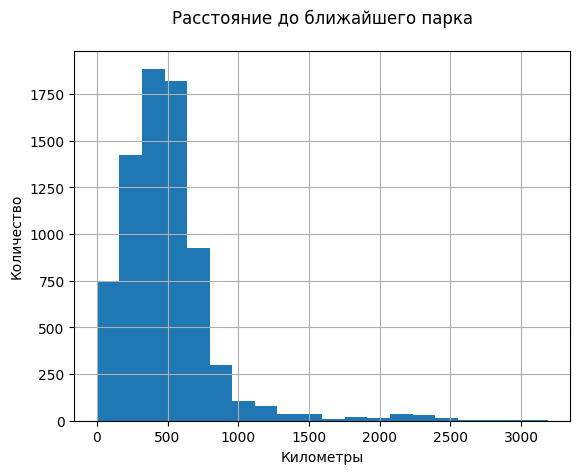

In [142]:
data.query('parks_nearest > 0')['parks_nearest'].hist(bins=20)
plt.title('Расстояние до ближайшего парка', pad=20)
plt.xlabel('Километры')
plt.ylabel('Количество')
plt.show()

**Вывод**

Квартиры в основном имеют площадь от 40 до 70 квадратных метров. Размер жилой площади и площади кухни прямопропорциональны общей площади квартиры. Большинство квартир продается по цене от 3 до 10 млн. В среднем квартиры в продаже до 3 комнат. Высота потолков от 2.4 до 2.8 м. Также на рынке есть достаточно много квартир с потолками 3м. Большая часть продаваемых квартир находиться на высоте до 10 этажа, это и не удивительно, так как большинство домов в продаже имеют 5  и 10 этажей. Более высокий этаж найти сложнее, так как чем больше этажей тем меньше таких домов.

В Петербурге большинство домов находить на расстоянии от 7 до 20 км от центра. Предложений ближе к центру чем 7 км - меньше. То же самое с расстоянием до аэропорта и парков: пики на 20 км и 500 м соответственно. 

Обьявления чаще  выкладываются в будние дни с пиком в четверг. В выходные активность вдвое меньше.
По месяцам размещения обьявлений прослеживается сезонность - падения в январе, мае, декабре. Снижение летом. Рост посленовогодних праздников и осенью.

### Как быстро продавались квартиры

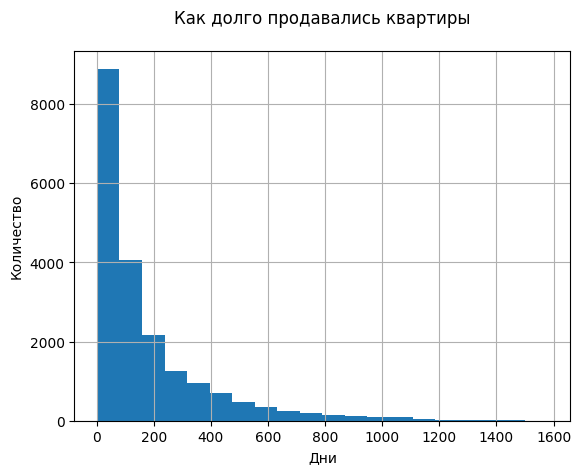

In [143]:
days_exposition = data.query('days_exposition > 0')['days_exposition']
days_exposition.hist(bins=20)
plt.title('Как долго продавались квартиры', pad=20)
plt.xlabel('Дни')
plt.ylabel('Количество')
plt.show()

In [144]:
days_exposition_desc =  days_exposition.describe()
days_exposition_desc

count    19846.000000
mean       177.726494
std        216.425896
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [145]:
days_exposition.median()

93.0

Посчитаем границу выбросов сверху:

In [146]:
days_exposition_desc['75%'] + (days_exposition_desc['75%'] -days_exposition_desc['25%'])*1.5

499.0

Посмотрим, что из себя представляют быстрые продажи

In [147]:
days_exposition.value_counts().sort_index().head(15)

1       1
2       3
3     155
4     172
5     144
6     123
7     233
8     133
9     137
10    127
11    134
12    107
13    124
14    142
15    120
Name: days_exposition, dtype: Int64

In [148]:
days_100 = days_exposition.value_counts().sort_index().head(100)
days_100

1        1
2        3
3      155
4      172
5      144
      ... 
96      52
97      66
98      68
99      50
100     54
Name: days_exposition, Length: 100, dtype: Int64

<AxesSubplot:title={'center':'Распределение длительности размещения обьявлений'}, xlabel='Дни', ylabel='Количество объявлений'>

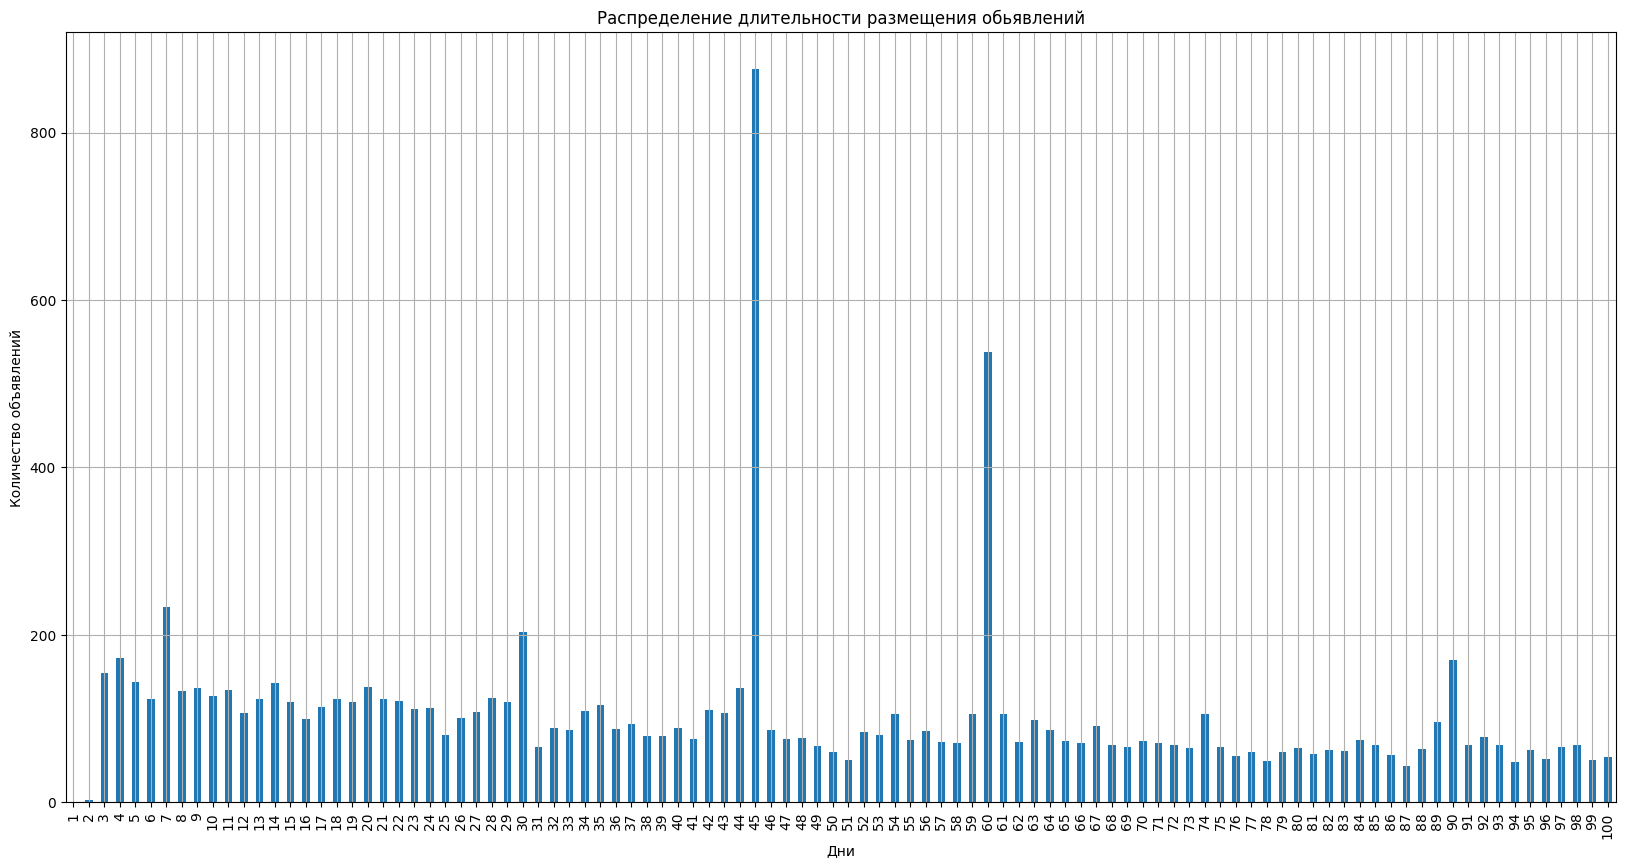

In [149]:
days_100.plot(kind='bar', grid=True, figsize=(20, 10), title='Распределение длительности размещения обьявлений', 
                          xlabel='Дни', ylabel='Количество объявлений')

**Вывод**

В среднем продажа занимает 178 дней. Медианная продажа занимает 93 дня. Это говорит о том,что есть несколько необычайно долгих продаж, которые влияют на расчет среднего.

Необычайно долгими можно считать продажи, занимающие более 499 дней.
Необычайно короткими можно считать продажи быстрее 3 дней.

### Исследование влияние факторов на стоимость

Исследуем зависимость цены от:        
        
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год)

<AxesSubplot:title={'center':'Зависимость цены от общей площади'}, xlabel='Общая площадь', ylabel='Цена'>

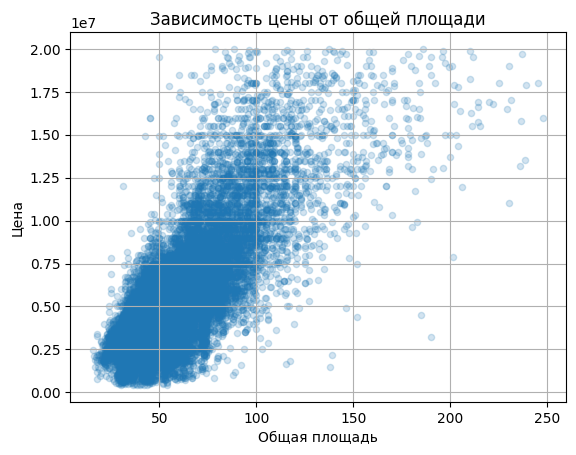

In [150]:
data.plot(kind='scatter', x = 'total_area', y='last_price', grid=True, title='Зависимость цены от общей площади', 
          xlabel='Общая площадь', ylabel='Цена', alpha=0.2)

<AxesSubplot:title={'center':'Зависимость цены от жилой площади'}, xlabel='Жилая площадь', ylabel='Цена'>

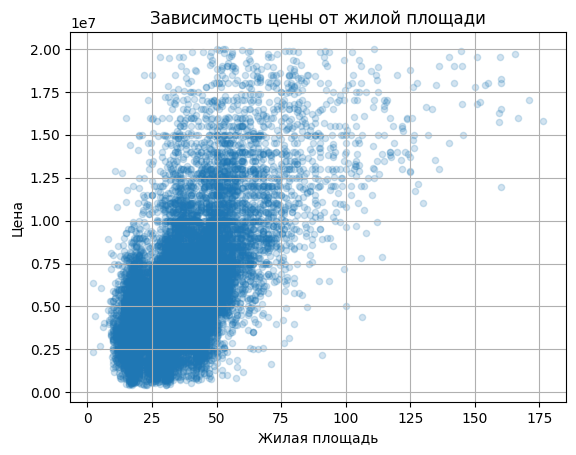

In [151]:
data.plot(kind='scatter', x = 'living_area', y='last_price', grid=True, title='Зависимость цены от жилой площади',
           xlabel='Жилая площадь', ylabel='Цена',alpha=0.2)

<AxesSubplot:title={'center':'Зависимость цены от площади кухни'}, xlabel='Площадь кухни', ylabel='Цена'>

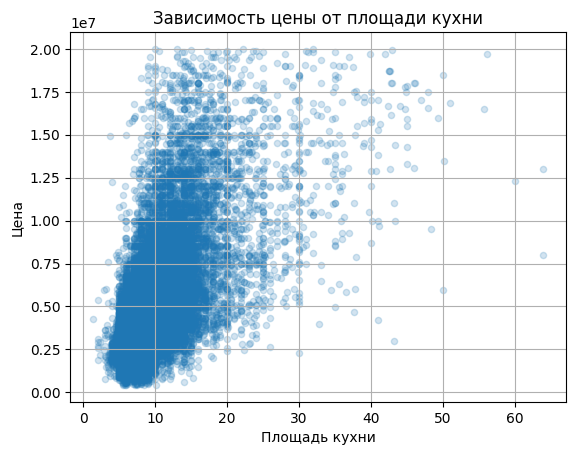

In [152]:
data.plot(kind='scatter', x = 'kitchen_area', y='last_price', grid=True, title='Зависимость цены от площади кухни', 
          xlabel='Площадь кухни', ylabel='Цена', alpha=0.2)

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='Количество комнат', ylabel='Цена'>

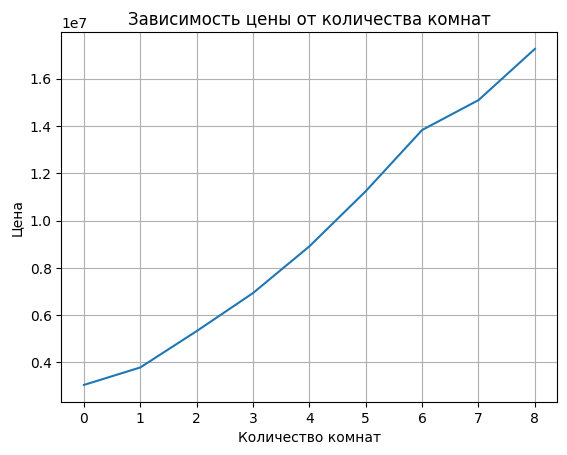

In [153]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, title='Зависимость цены от количества комнат', 
                                                          xlabel='Количество комнат', ylabel='Цена',legend=False)

In [154]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr().round(2)

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.00,0.77,0.67,0.60,0.51
total_area,0.77,1.00,0.93,0.57,0.80
living_area,0.67,0.93,1.00,0.35,0.87
kitchen_area,0.60,0.57,0.35,1.00,0.23
rooms,0.51,0.80,0.87,0.23,1.00


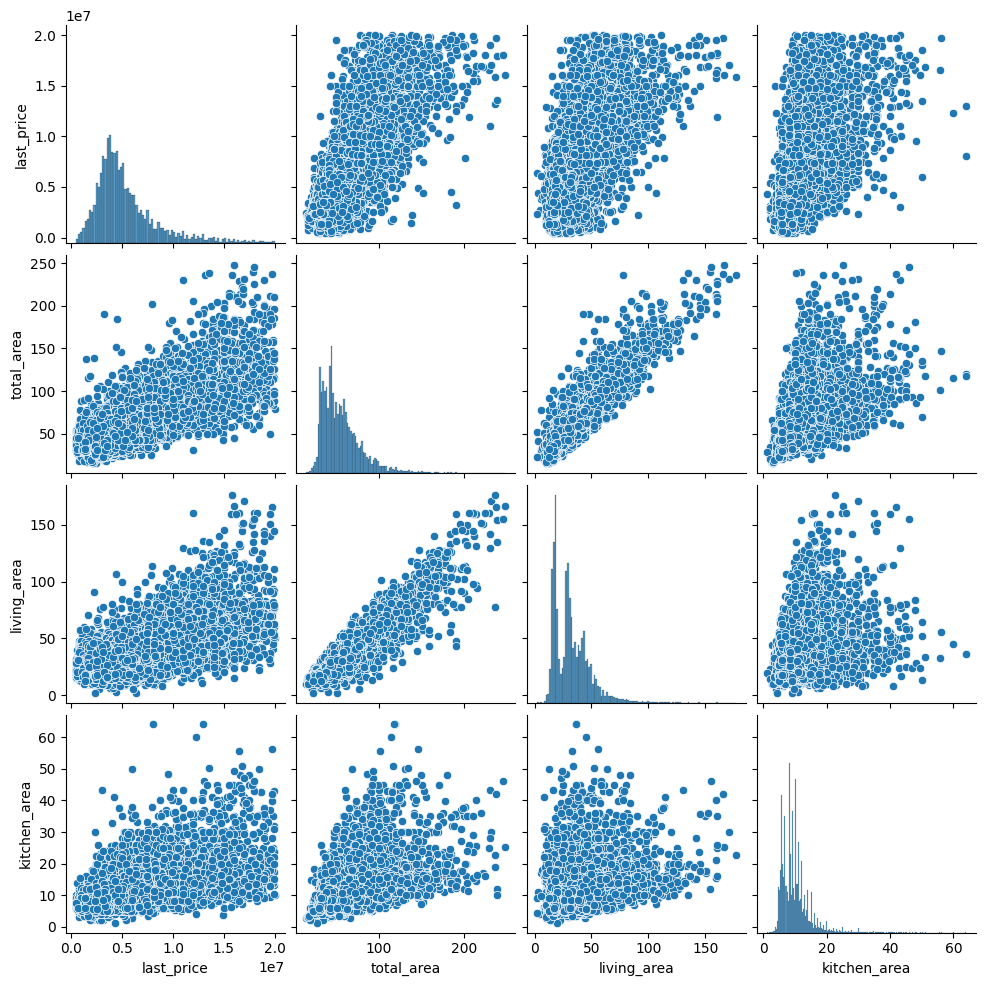

In [155]:
sns.pairplot(data[['last_price','total_area' ,'living_area', 'kitchen_area']])

<AxesSubplot:title={'center':'Зависимость цены от типа этажа'}, xlabel='Тип этажа', ylabel='Цена'>

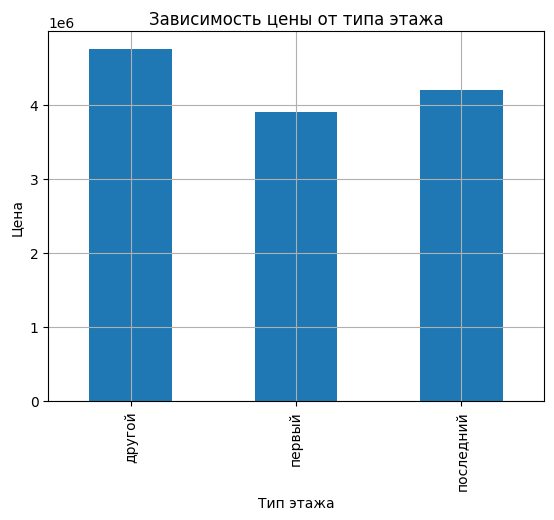

In [156]:
ftype_price = data.pivot_table(index='floor_type', values='last_price', aggfunc=['median'])
ftype_price.columns = ['median']
ftype_price['median'].plot(kind='bar', grid=True, title='Зависимость цены от типа этажа', xlabel='Тип этажа', ylabel='Цена')

<AxesSubplot:title={'center':'Зависимость цены от дня размещения объявления'}, xlabel='День', ylabel='Цена'>

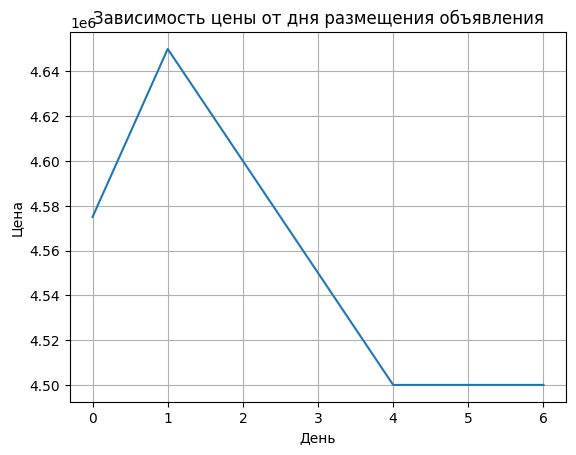

In [157]:
day_price = data.pivot_table(index='day', values='last_price', aggfunc=['median'])
day_price.columns = ['median']
day_price['median'].plot(grid=True,title='Зависимость цены от дня размещения объявления', xlabel='День', ylabel='Цена')

<AxesSubplot:title={'center':'Зависимость цены от месяца'}, xlabel='Месяц', ylabel='Цена'>

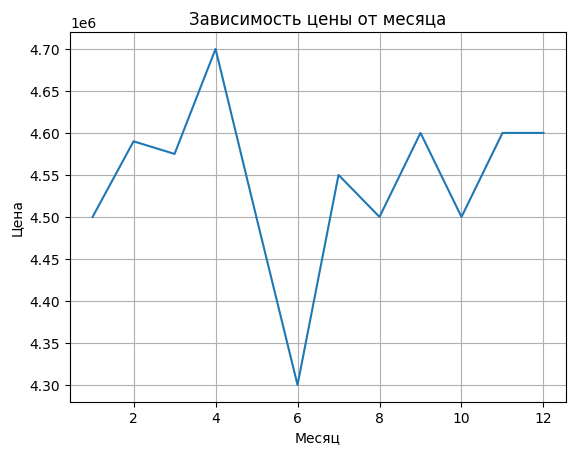

In [158]:
month_price = data.pivot_table(index='month', values='last_price', aggfunc=['median'])
month_price.columns = ['median']
month_price['median'].plot(grid=True,title='Зависимость цены от месяца', xlabel='Месяц', ylabel='Цена')

<AxesSubplot:title={'center':'Зависимость цены от года'}, xlabel='Год', ylabel='Цена'>

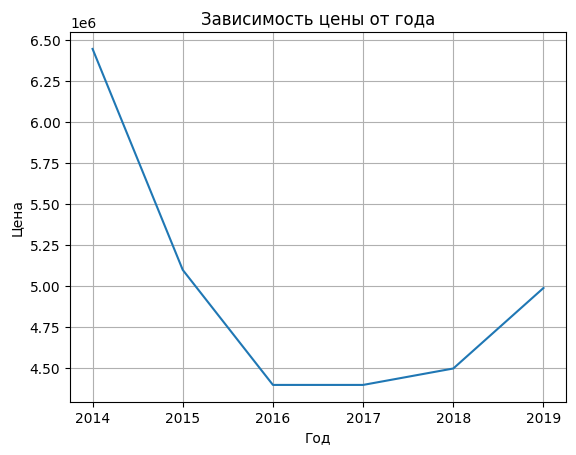

In [159]:
year_price = data.pivot_table(index='year', values='last_price', aggfunc=['median'])
year_price.columns = ['median']
year_price['median'].plot(grid=True, title='Зависимость цены от года', xlabel='Год', ylabel='Цена')

**Вывод**

Стоимость квартир прямопропорционально зависит от общей, жилой и площади кухни.
Также на стоимость влияет количество комнат. Чем больше комнат, тем дороже.

Нахождение квартиры на первом  или последнем этаже снижает ее стоимость. Причем на превом этаже квартиры стоят еще дешевле, чем на последнем.

Интересно, что квартиры размещаемые в выходные стоят дешевле, чем те, которые размещены в будние дни. Пик стоимости квартир в зависимости от дня размещения приходиться на вторник.

Похоже стоимость выставляемого обьявления зависит от активности покупателей. Так стоимость квартир в обьявлениях падает в новогодний период и период летних отпусков. И растет осенью и весной.

Также в зависимоти от года размещения объявления мы можем проследить как менялась цена все эти годы. Так максимальными цены были в 2014 году. Затем упалидо минимума в 2016 и начали снова расти с 2018, но до пика цен в 2014 еще очень далеко. Такое изменение цен по годам можно обьяснить влиянием курса валют и экономической активностью населения.

### Средняя цена квадратного метра для 10 населенных пунктов с наибольшим числом обьявлений

In [160]:
loc_top_10 = data.pivot_table(index='locality_name', values='metr_price', aggfunc=['count', 'mean'])
loc_top_10.columns = ['count', 'mean']
top_10_sorted = loc_top_10.sort_values(by='count', ascending=False).head(10).round(0)
top_10_sorted

,count,mean
locality_name,,
Санкт-Петербург,14923,108589.0
Мурино,586,86041.0
Кудрово,470,95260.0
Шушары,439,78552.0
Всеволожск,397,67214.0
Пушкин,360,101789.0
Колпино,337,75333.0
Парголово,327,90177.0
Гатчина,307,68746.0


In [161]:
top_10_sorted.head(1)

,count,mean
locality_name,,
Санкт-Петербург,14923,108589.0


In [162]:
top_10_sorted.tail(1)

,count,mean
locality_name,,
Выборг,237,58142.0


**Вывод**

Самая высокая стоимость квадратного метра в Санкт-Петербурге и составляет 108 тыс. руб.

Самая низкая стоимость из топ 10 населенных пунктов по количеству обьявлений в Выборге и составляет 58 тыс. руб.

### Цена каждого километра в зависимости от расстояния от центра Петербурга

In [163]:
spb = data.query('locality_name == "Санкт-Петербург" and center_distance > 0')

In [164]:
spb_km_price = spb.pivot_table(index='center_distance', values='last_price', aggfunc=['mean', 'count'])
spb_km_price

,mean,count
,last_price,last_price
center_distance,,
1,1.055320e+07,150
2,9.965063e+06,255
3,9.021080e+06,320
4,9.344506e+06,611
5,9.332543e+06,771
6,8.583335e+06,507
7,7.918316e+06,337
8,7.831701e+06,548


<AxesSubplot:title={'center':'Зависимость среденей цены от расстояния до центра'}, xlabel='Расстояние от центра', ylabel='Средняя цена'>

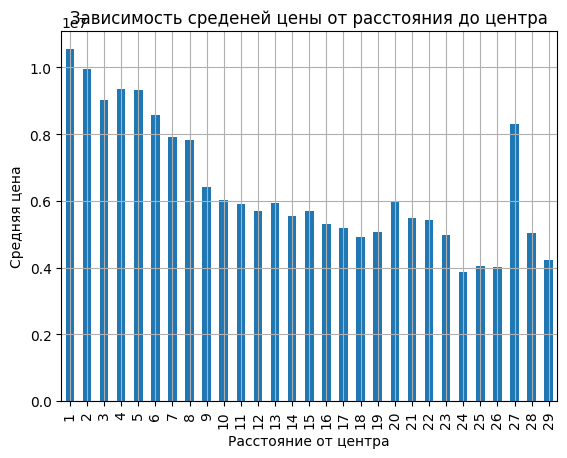

In [165]:
spb_km_price['mean'].plot(grid=True, kind='bar', title='Зависимость среденей цены от расстояния до центра', 
                         xlabel='Расстояние от центра', ylabel='Средняя цена', legend=False)

**Вывод**

Цена квартир падает с удаленностью от центра города.

На графике есть пик расстоянии 28 км. Но его нельзя считать реперезентативным, так как там всего 2 измерения и скорее всего они не отражают действительность.

## Общий вывод

В ходе исследования мы исправили ошибки в данных. **Большая часть ошибок в данных была связанна с ошибками заполнения**, так как данные заполнями люди, размещающие обьявления.

Целью исследования было определить факторы влияющие на стоимость недвижимости. Мы пришли к следующим выводам:

- **стоимость прямопропорциональна общей, жилой площади квартиры и площади кухни, а также количеству комнат;**
- **квартиры на первом и последнем этажах стоят дешевле;**
- **стоимость квартиры зависит от дня размещения. Так наиболее дорого квартиры размешаются в будние дни с пиком стоимости во вторник;**
- **стоимость зависит от сезонности. Так квартиры размещаютя дешевле летом;**
- **также стоимость квартир зависит от экономической ситуации и курса валюты;**
- **чем ближе квартира к центру города, тем дороже она стоит. Дешевле недвижимость в деревнях.**

Также мы выяснили, что больше объявлений размещается в будние дни и падает в выходные, праздничные дни и летом.
Самыми популярными на рынке являются квартиры площадью от 40 до 70 кв. м. Ценой от 3 до 10 млн. Большинство квартир до 10 этажа. Больше всего домов 5 этажных. Большинство объявлений квартир в Петербурге находяться на расстоянии 7-20 км от центра.

